# Porphyry_datasheet EDA

## 1.Dataset Overview
The dataset under analysis is the Porphyry Datasheet, sourced from the United States Geological Survey (USGS). This dataset is described as A Global Database of Porphyry Copper Deposits and Prospects. It provides comprehensive information about porphyry copper deposits, which are significant sources of copper, molybdenum, gold, and silver. These deposits are primarily located along convergent plate margins and exhibit distinct geochemical characteristics based on their tectonic origins—whether formed in continental/island arcs, back-arcs, or syn- to post-collisional environments (Hofstra et al., 2021).

*Key Features of the Dataset*

- Deposit Information: Names, locations, and classifications of deposits.
- Age Data: Includes known ages and analytical methods used for determination.
- Tectonic Origin: Interpreted tectonic settings based on geological studies.
- Grade-Tonnage Data: Compiled from publicly available databases where accessible.

## 2.Data Loading and Initial Exploration

- Load the dataset into a Pandas DataFrame.
- Examine the structure of the data using functions like .head(), .info(), and .describe().
- Identify missing values, data types, and overall data quality.

Porphyry datasheet consists of 2394 rows and 33 columns and includes 5 numerical columns (float64) and 28 text-based columns (object). 
- Numerical columns: 
    - LATITUDE: WGS84 latitude of the deposit in decimal degrees;
    - LONGITUDE: WGS84 longitude of the deposit in decimal degrees;
    - NUMERIC_AGE_MINER_MA: Reported numeric age of mineralization for the deposit;
    - NUMERIC_AGE_UNCERTAINTY_MA: Reported uncertainty of the numeric age;
    - STRATIGRAPHIC_AGE: Stratigraphic age of the deposit based on the published geologic timescale by Walker and others (2018).
    - STRAT_AGE_MAX_MA: Maximum numeric age determined from the stratigraphic age and the published geologic timescale by Walker and others (2018);
    - STRAT_AGE_MIN_MA: Minimum numeric age determined from the stratigraphic age and the published geologic timescale by Walker and others (2018);
    - STRAT_AGE_MEDIAN_MA: Median numeric age determined from the stratigraphic age and the published geologic timescale by Walker and others (2018);
    - ASSIGNED_AGE_MA: The assigned numeric age for the deposit;
    - ORE_TONNAGE_MT: Reported tonnage of ore in megatonnes;
    - CU_PERCENT: Reported average copper grade of ore;
    - MO_PERCENT: Reported average molybdenum grade of ore;
    - AU_GT: Reported average gold grade of ore;
    - AG_GT: Reported average silver grade of ore;

- Text-based columns:
    - DEPOSIT: Deposit name;
    - ORIGINAL_DATABASE_SOURCE: Original database the deposit was ingested from;
    - COUNTRY: Country the deposit is located;
    - COUNTRY_ABR: Abbreviation of the country name;
    - LOCATION_REF： Reference from which the location of the deposit was obtained；
    - CMMI_DEPOSIT_ENVIRONMENT: Critical mineral mapping initiative (CMMI) deposit environment classification based on Hofstra and others (2021);
    - CMMI_DEPOSIT_GROUP: Critical mineral mapping initiative (CMMI) deposit group classification based on Hofstra and others (2021);
    - CMMI_DEPOSIT_TYPE: Critical mineral mapping initiative (CMMI) deposit type classification based on Hofstra and others (2021);
    - REPORTED_DEPOSIT_SUBTYPE: Published/reported deposit subtype based on the chemical affinity of the causative intrusions;
    - AGE_TYPE: Indicates whether the age directly reflects mineralization or is inferred from other relationships;
    - AGE_BASIS: Indicates the geologic basis on which the age was determined;
    - PUBLISHED_AGE: Published age of the deposit;
    - METHOD: Geochronological method used to determine the age of the deposit;
    - DATE_MINERAL: Mineral analyzed to determine the age of mineralization;
    - AGE_REFERENCES: Reference(s) from which the deposit age and associated data were obtained. Full citations are contained in references.docx;
    - TECTONIC_SETTING: Reported tectonic setting for the deposit;
    - TECTONIC_SETTING_REFERENCE: Reference from which the tectonic setting was obtained;
    - G-T_REF: Reference(s) from which the grade and tonnage information was obtained;
    - COMMENTS: Additional comments about the deposit;

In [8]:
# load porphyry_datasheet

import pandas as pd

# read Porphyry_datasheet
df = pd.read_csv('../data/raw/Dataset/USGS/Porphyry_Copper_Deposit/Porphyry_datasheet.csv'
                 , encoding='ISO-8859-1') # porphyry_dataset unicode is ISO-8859-1

# show the first 5 rows
df.head()

,DEPOSIT,ORIGINAL_DATABASE_SOURCE,COUNTRY,COUNTRY_ABR,LATITUDE,LONGITUDE,LOCATION_REF,CMMI_DEPOSIT_ENVIRONMENT,CMMI_DEPOSIT_GROUP,CMMI_DEPOSIT_TYPE,...,AGE_REFERENCES,TECTONIC_SETTING,TECTONIC_SETTING_REFERENCE,ORE_TONNAGE_MT,CU_PERCENT,MO_PERCENT,AU_GT,AG_GT,G-T_REF,COMMENTS
0,308 Zone,Dicken and others (2016),United States,USA,59.7779,-155.4850,Dicken and others (2016) and references therein,Magmatic hydrothermal,Porphyry,Porphyry copper,...,Lang and others (2013),continental arc,Dicken and others (2016) and references therein,,,,,,NaN,NaN
1,38 Porphyry,Dicken and others (2016),United States,USA,59.7981,-155.4219,Dicken and others (2016) and references therein,Magmatic hydrothermal,Porphyry,Porphyry copper-molybdenum,...,Lang and others (2013),continental arc,Dicken and others (2016) and references therein,,,,,,NaN,NaN
2,Ab Talkhun,Dicken and others (2016),Iran,IRN,29.8167,56.1250,Dicken and others (2016) and references therein,Magmatic hydrothermal,Skarn,Skarn copper,...,Dicken and others (2016) and references therein,continental arc,Dicken and others (2016) and references therein,,,,,,NaN,Possible porphyry-related Cu-Fe skarn.
3,Abbas Abad1,Dicken and others (2016),Iran,IRN,38.8833,46.7500,Dicken and others (2016) and references therein,Magmatic hydrothermal,Porphyry,Porphyry copper,...,Dicken and others (2016) and references therein,postconvergence,Dicken and others (2016) and references therein,,,,,,NaN,NaN
4,Abdar silicat v.,Dicken and others (2016),Iran,IRN,30.3035,55.3094,Dicken and others (2016) and references therein,Magmatic hydrothermal,Porphyry,Porphyry copper,...,Dicken and others (2016) and references therein,continental arc,Dicken and others (2016) and references therein,,,,,,NaN,NaN


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DEPOSIT                     2394 non-null   object 
 1   ORIGINAL_DATABASE_SOURCE    2394 non-null   object 
 2   COUNTRY                     2394 non-null   object 
 3   COUNTRY_ABR                 2394 non-null   object 
 4   LATITUDE                    2394 non-null   float64
 5   LONGITUDE                   2394 non-null   float64
 6   LOCATION_REF                2394 non-null   object 
 7   CMMI_DEPOSIT_ENVIRONMENT    2394 non-null   object 
 8   CMMI_DEPOSIT_GROUP          2394 non-null   object 
 9   CMMI_DEPOSIT_TYPE           2394 non-null   object 
 10  REPORTED_DEPOSIT_SUBTYPE    2394 non-null   object 
 11  PUBLISHED_AGE               2394 non-null   object 
 12  AGE_TYPE                    2096 non-null   object 
 13  AGE_BASIS                   2096 

The dataset contains a total of 2339 unique deposits distributed across 68 countries. Among these, Australia ranks 9th with 95 unique deposits.

In [9]:
# Check the number of unique deposits
unique_deposits = df['DEPOSIT'].nunique()
print(f"Number of unique deposits: {unique_deposits}")

# Check the number of unique countries
unique_countries = df['COUNTRY'].nunique()
print(f"Number of unique countries: {unique_countries}")

# Group by country and count the number of unique deposits per country
deposits_per_country = df.groupby('COUNTRY')['DEPOSIT'].nunique().sort_values(ascending=False)

# Display the result
print(deposits_per_country.head(10))

Number of unique deposits: 2339
Number of unique countries: 68
COUNTRY
Canada           302
United States    241
China            198
Mongolia         188
Iran             184
Philippines      139
Russia           119
Turkey           110
Australia         95
Chile             86
Name: DEPOSIT, dtype: int64


## 3.Australia Porphyry Copper Dataset Information

We are primarily focused on the porphyry copper deposits in Australia. To achieve this, we extracted data specific to Australia from the dataset. This allows us to examine the distribution of deposits within Australia and analyze the dataset's characteristics related to Australian.

In [ ]:
# filter the data for Australia
australia_porphyry_data = df[df['COUNTRY'] == 'Australia']
australia_porphyry_copper_data = australia_porphyry_data[australia_porphyry_data['CMMI_DEPOSIT_TYPE'] == 'Porphyry copper']

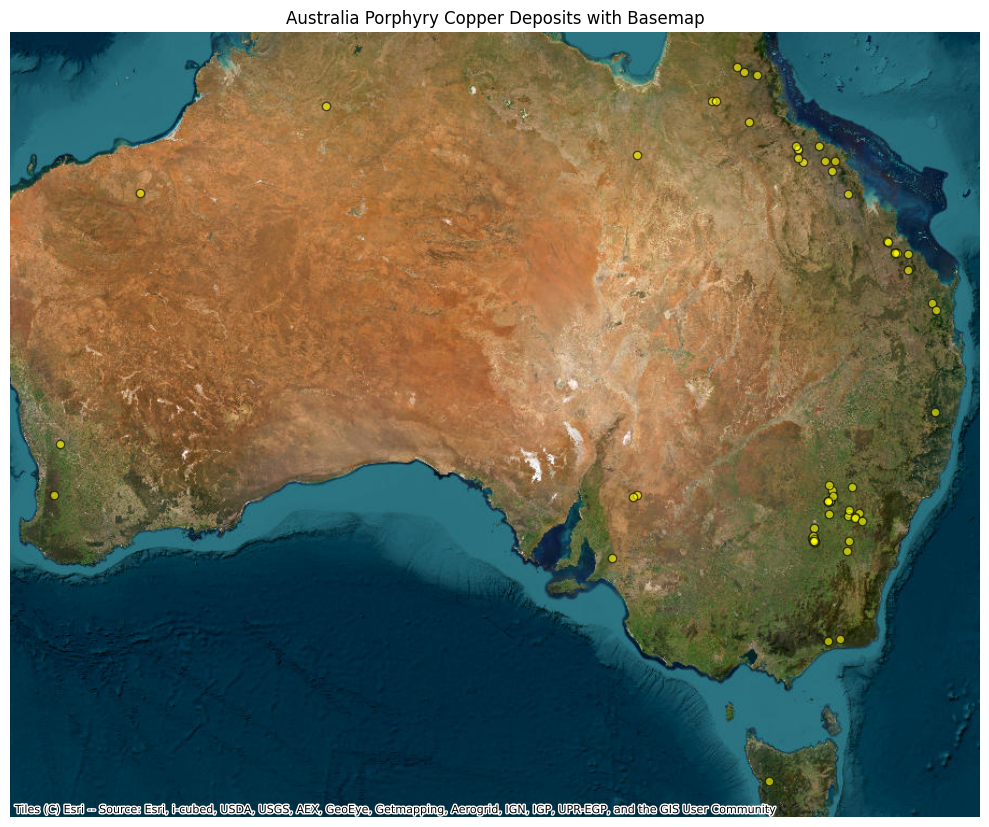

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(australia_porphyry_copper_data['LONGITUDE'], australia_porphyry_copper_data['LATITUDE'])]
gdf = gpd.GeoDataFrame(australia_porphyry_copper_data, geometry=geometry, crs='EPSG:4326')  

gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, alpha=0.6, color='yellow', edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

ax.set_title('Australia Porphyry Copper Deposits with Basemap')
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [19]:
print(australia_porphyry_copper_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 47 to 2293
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DEPOSIT                     69 non-null     object 
 1   ORIGINAL_DATABASE_SOURCE    69 non-null     object 
 2   COUNTRY                     69 non-null     object 
 3   COUNTRY_ABR                 69 non-null     object 
 4   LATITUDE                    69 non-null     float64
 5   LONGITUDE                   69 non-null     float64
 6   LOCATION_REF                69 non-null     object 
 7   CMMI_DEPOSIT_ENVIRONMENT    69 non-null     object 
 8   CMMI_DEPOSIT_GROUP          69 non-null     object 
 9   CMMI_DEPOSIT_TYPE           69 non-null     object 
 10  REPORTED_DEPOSIT_SUBTYPE    69 non-null     object 
 11  PUBLISHED_AGE               69 non-null     object 
 12  AGE_TYPE                    61 non-null     object 
 13  AGE_BASIS                   61 non-null